In [30]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install pandas-datareader
# %pip install scikit-learn
# %pip install yfinance
# %pip install statsmodels
# %pip install scipy

# Imports

##### Data source

Dalam pertemuan ini, kita akan mengambil data dari Yahoo Finance. Yahoo Finance berisikan data mengenai saham, cryptocurrency, exchange rate, dsb.

Informasi lebih lanjut: https://pandas-datareader.readthedocs.io/en/latest/

Pandas data reader membantu kita dalam mengambil data dari internet secara langsung melalui Python. Salah satu sumber data yang didukung adalah Yahoo Finance.

##### Visualization

Visualisasi data runtun waktu akan menggunakan diagram garis melalui package seaborn dan matplotlib.

##### Forecast Method
Metode peramalan yang akan digunakan adalah Exponential Smoothing, ARIMA, dan Prophet. 

Package statsmodels menyediakan beberapa metode peramalan: https://www.statsmodels.org/devel/examples/index.html#time-series-analysis

##### Evaluasi
Evaluasi model menggunakan nilai RMSE.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
import statsmodels
import scipy

pd.set_option('display.max_columns', None)
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

# Get Data

Section ini akan membahas mengenai cara mengambil data dari Yahoo Finance. Untuk mengambil data, kita akan menggunakan fungsi/method bernama pdr.DataReader('kode', 'tipe', 'start', 'end', 'interval').

- 'Kode' berisikan kode data yang ingin diambil (bisa berupa id saham, perusahaan, dsb).
- 'Tipe' berisikan tipe data yang diinginkan ('yahoo' : data historis saham, 'yahoo-actions' : data dividen dan stock split, 'yahoo-dividens' : data dividen)
- 'Start' berisikan tanggal awal
- 'End' berisikan tanggal akhir
- 'Interval' berisikan interval waktu (default: harian, '1mo' : bulanan, '1h' : per jam, '1wk' : mingguan, etc)

Data yang diberikan yaitu:
- 'Date' tanggal
- 'Close' yaitu closing price / harga terakhir di tanggal tsb
- 'Open' yaitu opening price / harga pertama di tanggal tsb
- 'High' yaitu harga tertinggi di tanggal tsb
- 'Low' yaitu harga terendah di tanggal tsb
- 'Volume' yaitu banyaknya transaksi di tanggal tsb
- 'Adj Close' yaitu closing price yang diadjust berdasar dividen, stock split, etc

### Yahoo Finance

##### Contoh mengambil data harian saham GOTO (kode: GOTO.JK)

In [32]:
# Secara default, nilai interval adalah harian
saham_goto = pdr.get_data_yahoo('GOTO.JK', start = '2023-01-01', end = '2023-02-01')
saham_goto.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,91.0,94.0,91.0,93.0,93.0,897258100
2023-01-03,93.0,97.0,93.0,95.0,95.0,2761729900
2023-01-04,95.0,97.0,93.0,96.0,96.0,1816437300
2023-01-05,96.0,96.0,91.0,92.0,92.0,1795026400
2023-01-06,92.0,95.0,91.0,95.0,95.0,802624500


##### Contoh mengambil data bulanan saham Unilever

In [33]:
# Secara default akan mengambil data hingga yang terbaru
saham_unvr = pdr.get_data_yahoo('UNVR.JK', start = '2023-01-01', interval = '1mo')
saham_unvr.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,4700.0,4870.0,4570.0,4660.0,4660.0,202158900
2023-02-01,4630.0,5050.0,4180.0,4180.0,4180.0,425614300
2023-03-01,4170.0,4370.0,4040.0,4350.0,4350.0,276932600
2023-04-01,4350.0,4470.0,3960.0,4400.0,4400.0,230492500
2023-05-01,4400.0,4530.0,4280.0,4450.0,4450.0,182781400


##### Contoh mengambil data closing price mingguan dari beberapa saham sekaligus

In [34]:
# Siapkan dataframe untuk menyimpan datanya
closing_price_saham = pd.DataFrame()

# Siapkan list kode saham, start date, dan end date
daftar_kode_saham = ['NVDA', 'MSFT', 'AAPL', 'QCOM', 'AMD', 'INTC', 'JOKO', 'JPM', 'IBM']
start_date = '2021-01-01'
end_date = '2023-01-01'

# Loop untuk mengambil data masing2 saham
for kode in daftar_kode_saham:
    saham = pdr.get_data_yahoo(kode, start_date, end_date, interval = '1wk')['Close']

    # Jika data saham Null (tidak ditemukan), maka tidak perlu disimpan
    if not saham.isnull().all():
        closing_price_saham[kode] = saham

closing_price_saham.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JOKO: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NVDA,MSFT,AAPL,QCOM,AMD,INTC,JPM,IBM
Date,,,,,,,,
2021-01-01,133.440002,218.289993,130.919998,155.699997,95.160004,52.189999,135.869995,123.317398
2021-01-08,132.002502,213.020004,128.910004,160.850006,90.790001,59.250000,141.169998,123.298279
2021-01-15,138.675003,224.970001,136.869995,164.750000,91.529999,62.459999,134.830002,125.860420
2021-01-22,130.509995,238.929993,137.089996,155.550003,87.519997,56.070000,130.110001,114.799232
2021-01-29,136.642502,242.009995,137.389999,147.970001,87.839996,58.790001,138.250000,115.697899


### Visualize

Salah satu cara yang umum untuk visualisasi data runtun waktu adalah dengan menggunakan diagram garis. Secara default, indeks date (tanggal) sudah dalam format yang sesuai, yaitu YYYY-MM-DD

##### Line plot closing price saham

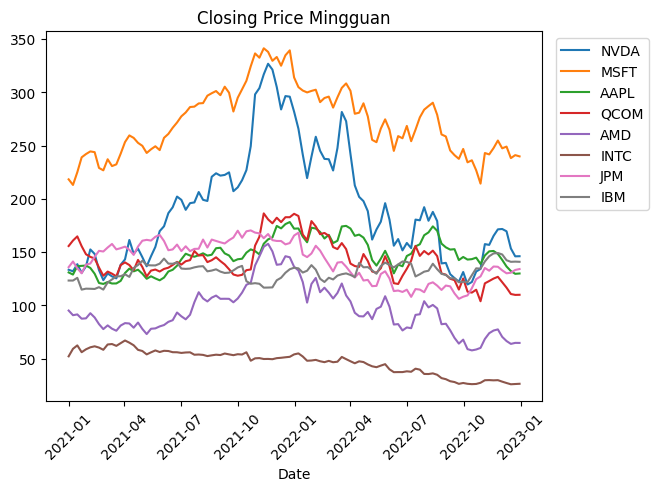

In [35]:
sns.lineplot(closing_price_saham, dashes = False)

# Ubah posisi legenda agar berada di luar plot dengan bbox_to_anchor, letakkan di kanan atas
plt.legend(loc = 'upper right', bbox_to_anchor = (1.23, 1))

# Beri Judul
plt.title('Closing Price Mingguan')

# Rotate label sumbu X agar tidak bertumpuk (overlapping)
plt.xticks(rotation = 45)

plt.show()

# Data Preparation

### Split Train Test

Seperti model ML yang dipelajari sebelumnya, dalam forecasting kita perlu untuk melakukan splitting data latih dan uji. Hal ini dilakukan agar kita dapat melakukan evaluasi terhadap hasil prediksi.

Berbeda dari splitting data ML, dalam forecasting kita tidak melakukannya secara acak. Umumnya kita memilih 'cutoff date' atau tanggal pemisah. Sebagai contoh, nilai cutoff date '2022-06-01', maka seluruh data sebelum tanggal tsb adalah data Train, data setelah tanggal tsb adalah data Test.

Perlu diingat bahwa splitting ini tidak harus selalu dilakukan. Kita dapat melakukan evaluasi model dengan data train (tanpa perlu data test), atau melakukan split menjadi Train, Validation, dan Test.

##### Contoh splitting data menjadi train dan test

In [36]:
cutoff_date = pd.to_datetime('2022-06-01')
train = closing_price_saham[closing_price_saham.index < cutoff_date]
test = closing_price_saham[closing_price_saham.index >= cutoff_date]

##### Visualize closing price saham NVIDIA

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01')])

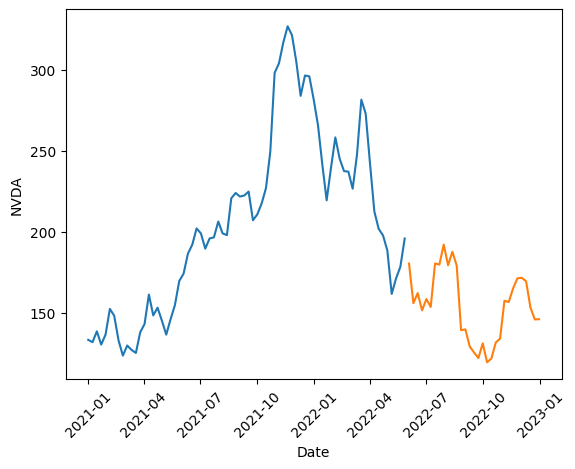

In [37]:
sns.lineplot(train['NVDA'])
sns.lineplot(test['NVDA'])
plt.xticks(rotation = 45)

Plot di atas menunjukkan bahwa closing price saham NVIDIA mengalami tren positif hingga Oktober 2021, kemudian mengalami tren negatif hingga akhir 2022. Tidak terlihat adanya efek musiman yang jelas, namun melihat kondisi pasar produk NVIDIA, pola musiman seharusnya terjadi setiap 1 tahun sekali (rilis produk baru).

# Forecast

Sebelum kita membahas mengenai forecasting, terdapat beberapa istilah yang perlu dipahami agar tidak terjadi kesalahan interpretasi. 

Kata 'forecast' merujuk pada peramalan tanggal diluar sampel (tanggal baru di masa mendatang, data test).

Kata 'fitted' (atau bisa disebut one-step ahead forecast) merujuk pada peramalan tanggal di dalam sampel/data train.

Sebagai contoh, prediksi pada data train dinamakan 'fitted', sedangkan prediksi pada data test dinamakan 'forecast'.

### Exponential Smoothing

Exponential smoothing adalah salah satu teknik pemulusan data yang juga dapat digunakan untuk peramalan. Terdapat beberapa varian dari exponential smoothing, mulai dari Simple, Double, maupun Triple (Holt's Winter).

Contoh di bawah ini akan menggunakan Simple Exponential Smoothing dan Holt's Method. Detail lebih lanjut dapat dipelajari melalui https://www.statsmodels.org/devel/examples/notebooks/generated/exponential_smoothing.html

Selanjutnya, dilakukan peramalan untuk dibandingkan dengan data test. Metrics yang digunakan adalah RMSE, dimana nilai RMSE yang rendah menunjukkan hasil ramalan yang baik.

##### Simple Exp Smoothing

Simple Exp Smoothing adalah salah satu model paling sederhana, dimana ia tidak memperhatikan adanya tren maupun musiman. 

Model Simple Exp Smoothing dilatih pada data training saham NVDA, kemudian dilakukan fitting. Dalam Simple Exp Smoothing, terdapat 1 parameter berupa $\alpha$ yang berpengaruh terhadap seberapa mulus data yang dihasilkan. Alpha berada dalam interval [0, 1].

Di bawah ini adalah contoh fitting menggunakan alpha = 0.2 dan 0.6

In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Menggunakan nilai alpha = 0.2
simple_exp_2 = SimpleExpSmoothing(train['NVDA']).fit(smoothing_level = 0.2)

# Menggunakan nilai alpha = 0.6
simple_exp_6 = SimpleExpSmoothing(train['NVDA']).fit(smoothing_level = 0.6)

Kita dapat melihat evaluasi model berdasarkan data train dengan fungsi/method 'summary'. Akan ditampilkan beberapa metrics umum seperti SSE, AIC, BIC, dsb.

In [39]:
# Summary model alpha = 0.2
simple_exp_2.summary()

Dep. Variable:,NVDA,No. Observations:,74
Model:,SimpleExpSmoothing,SSE,54147.379
Optimized:,False,AIC,492.060
Trend:,None,BIC,496.668
Seasonal:,None,AICC,492.639
Seasonal Periods:,None,Date:,"Tue, 23 May 2023"
Box-Cox:,False,Time:,18:57:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
initial_level,133.44000,l.0,False


Untuk menghitung RMSE pada data train dan data test, kita akan menggunakan fungsi mean_square_error dalam library scikit-learn.

In [40]:
from sklearn.metrics import mean_squared_error

# Ambil nilai fitted
train_predict_2 = simple_exp_2.fittedvalues

# Lakukan peramalan sepanjang data test
test_predict_2 = simple_exp_2.forecast(len(test))

# Hitung RMSE data train dan test
train_rmse_2 = np.sqrt(mean_squared_error(train['NVDA'], train_predict_2))
test_rmse_2 = np.sqrt(mean_squared_error(test['NVDA'], test_predict_2))

# Hitung RMSE masing-masing model
print('Model SES alpha = 0.2 memiliki RMSE sebesar', train_rmse_2, 'untuk data train\n, dan',
      test_rmse_2, 'untuk data test.')

Model SES alpha = 0.2 memiliki RMSE sebesar 27.050348093387708 untuk data train
, dan 46.987473709432734 untuk data test.


Bandingkan dengan model alpha = 0.6

In [41]:
# Ambil nilai fitted
train_predict_6 = simple_exp_6.fittedvalues

# Lakukan peramalan sepanjang data test
test_predict_6 = simple_exp_6.forecast(len(test))

# Hitung RMSE data train dan test
train_rmse_6 = np.sqrt(mean_squared_error(train['NVDA'], train_predict_6))
test_rmse_6 = np.sqrt(mean_squared_error(test['NVDA'], test_predict_6))

# Hitung RMSE masing-masing model
print('Model SES alpha = 0.6 memiliki RMSE sebesar', train_rmse_6, 'untuk data train\n, dan',
      test_rmse_6, 'untuk data test.')

Model SES alpha = 0.6 memiliki RMSE sebesar 17.371365379943075 untuk data train
, dan 39.4059420014672 untuk data test.


Tampilkan hasilnya dalam sebuah plot

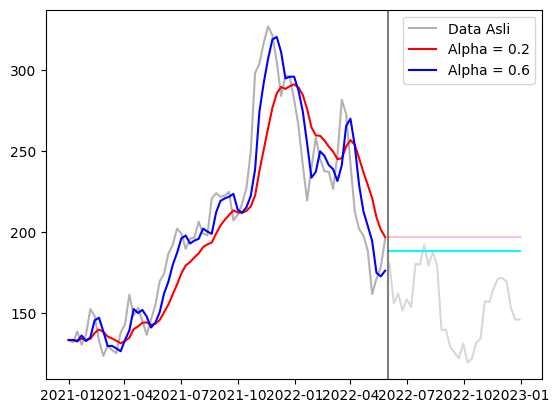

In [55]:
# Data Asli
(line1,) = plt.plot(train['NVDA'], color = 'black', alpha = 0.3)
plt.plot(test['NVDA'], color = 'gray', alpha = 0.3)

# Ramalan alpha = 0.2
(line2,) = plt.plot(train_predict_2, color = 'red')
plt.plot(test_predict_2, color = 'pink')

# Ramalan alpha = 0.6
(line3,) = plt.plot(train_predict_6, color = 'blue')
plt.plot(test_predict_6, color = 'cyan')

plt.axvline(cutoff_date, alpha = 0.5, color = 'black')
plt.legend([line1, line2, line3], ['Data Asli', 'Alpha = 0.2', 'Alpha = 0.6'])

Model dengan alpha 0.2 lebih baik dibandingkan model dengan alpha 0.6. Terlihat bahwa pada data train, hasil ramalan cukup akurat, akan tetapi pada data test hasilnya sangat buruk. Model SES hanya dapat memberikan ramalan yang konstan.

##### Holt's Method (Double Exp Smoothing)

Holts method adalah peningkatan terhadap model Simple, dimana ia dapat memperhitungkan adanya efek tren dalam data. Efek tren bisa bermacam-macam, seperti aditif, multiplikatif, damped, dan semacamnya.

Model Holt's menerima 2-3 parameter, yaitu alpha, beta, dan phi.
- Alpha mengatur tingkat pemulusan, semakin rendah maka semakin mulus.
- Beta mengatur tingkat tren
- Phi mengatur tingkat damping (tidak akan dibahas)

Data saham NVDA terlihat bahwa tren naik dan turun terjadi secara bertahap eksponensial, sehingga efek multiplikatif dinilai tepat untuk digunakan. Pada contoh di bawah ini, kita akan mencoba mencari nilai alpha & beta yang terbaik untuk efek tren yang multiplikatif.

In [43]:
from statsmodels.tsa.holtwinters import Holt
from scipy.stats import uniform
np.random.seed(seed = 4555182)

# Siapkan nilai alpha dan beta yang akan kita coba, yaitu pada rentang [0,1]
distribusi = uniform(0, 1)

#Siapkan list untuk menyimpan nilai alpha, beta, dan RMSE
hasil_alpha = []
hasil_beta = []
hasil_rmse_train = []
hasil_rmse_test = []

# Lakukan perulangan sebanyak 50 kali untuk mencari nilai alpha dan beta yang terbaik
for i in range(50):
    print('Iterasi ke', i)

    # Bangkitkan nilai random uniform untuk alpha dan beta
    alpha = distribusi.rvs()
    beta = distribusi.rvs()

    # Lakukan fitting dan forecast
    holt_exp = Holt(train['NVDA']).fit(smoothing_level = alpha, smoothing_trend = beta)
    holt_fitted = holt_exp.fittedvalues
    holt_forecast = holt_exp.forecast(len(test))

    # Hitung RMSE
    rmse_train = np.sqrt(mean_squared_error(train['NVDA'], holt_fitted))
    rmse_test = np.sqrt(mean_squared_error(test['NVDA'], holt_forecast))

    # Simpan hasilnya
    hasil_alpha.append(alpha)
    hasil_beta.append(beta)
    hasil_rmse_train.append(rmse_train)
    hasil_rmse_test.append(rmse_test)

hasil_holt = pd.DataFrame({
    'alpha' : hasil_alpha,
    'beta' : hasil_beta,
    'rmse_train' : hasil_rmse_train,
    'rmse_test' : hasil_rmse_test
})

Iterasi ke 0
Iterasi ke 1
Iterasi ke 2
Iterasi ke 3
Iterasi ke 4
Iterasi ke 5
Iterasi ke 6
Iterasi ke 7
Iterasi ke 8
Iterasi ke 9
Iterasi ke 10
Iterasi ke 11
Iterasi ke 12
Iterasi ke 13
Iterasi ke 14
Iterasi ke 15
Iterasi ke 16
Iterasi ke 17
Iterasi ke 18
Iterasi ke 19
Iterasi ke 20
Iterasi ke 21
Iterasi ke 22
Iterasi ke 23
Iterasi ke 24
Iterasi ke 25
Iterasi ke 26
Iterasi ke 27
Iterasi ke 28
Iterasi ke 29
Iterasi ke 30
Iterasi ke 31
Iterasi ke 32
Iterasi ke 33
Iterasi ke 34
Iterasi ke 35
Iterasi ke 36
Iterasi ke 37
Iterasi ke 38
Iterasi ke 39
Iterasi ke 40
Iterasi ke 41
Iterasi ke 42
Iterasi ke 43
Iterasi ke 44
Iterasi ke 45
Iterasi ke 46
Iterasi ke 47
Iterasi ke 48
Iterasi ke 49


In [44]:
hasil_holt.head()

,alpha,beta,rmse_train,rmse_test
0,0.028956,0.596738,36.604247,203.919710
1,0.253314,0.987831,26.702036,213.735217
2,0.340580,0.724138,23.577058,164.557834
3,0.660102,0.044311,16.960937,22.956615
4,0.723177,0.156756,16.590835,28.325727


Ambil kombinasi nilai alpha dan beta yang terbaik dan terburuk (berdasarkan rmse_test).

In [45]:
holt_best = hasil_holt[hasil_holt['rmse_test'] == np.min(hasil_holt['rmse_test'])]
holt_worst = hasil_holt[hasil_holt['rmse_test'] == np.max(hasil_holt['rmse_test'])]
print('Best:\n', holt_best,'\nWorst:\n',holt_worst)

Best:
       alpha      beta  rmse_train  rmse_test
3  0.660102  0.044311   16.960937  22.956615 
Worst:
       alpha      beta  rmse_train   rmse_test
9  0.127641  0.973918   38.194859  385.357774


Lakukan fitting kembali menggunakan alpha dan beta seperti di atas

In [46]:
# Lakukan fitting dan forecast
best_holt_exp = Holt(train['NVDA']).fit(smoothing_level = 0.660102, smoothing_trend = 0.044311)
best_holt_fitted = best_holt_exp.fittedvalues
best_holt_forecast = best_holt_exp.forecast(len(test))

worst_holt_exp = Holt(train['NVDA']).fit(smoothing_level = 0.127641, smoothing_trend = 0.973918)
worst_holt_fitted = worst_holt_exp.fittedvalues
worst_holt_forecast = worst_holt_exp.forecast(len(test))

Tampilkan plot perbandingan keduanya

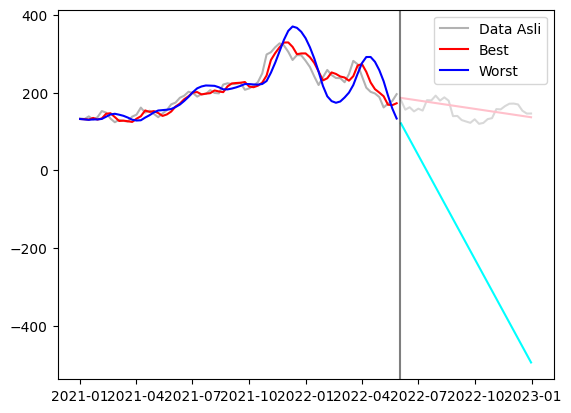

In [47]:
# Data Asli
(line1,) = plt.plot(train['NVDA'], color = 'black', alpha = 0.3)
plt.plot(test['NVDA'], color = 'gray', alpha = 0.3)

# Ramalan Terbaik
(line2,) = plt.plot(best_holt_fitted, color = 'red')
plt.plot(best_holt_forecast, color = 'pink')

# Ramalan Terburuk
(line3,) = plt.plot(worst_holt_fitted, color = 'blue')
plt.plot(worst_holt_forecast, color = 'cyan')

plt.axvline(cutoff_date, alpha = 0.5, color = 'black')

plt.legend([line1, line2, line3], ['Data Asli', 'Best', 'Worst'])

Hasil di atas menunjukkan perbedaan antara model Simple dan Holt, dimana ramalan model Holt masih bisa memiliki tren (tidak konstan), sehingga umumnya lebih akurat (asalkan alpha dan beta yang digunakan sudah baik).

### ARIMA

ARIMA (Autoregressive Integrated Moving Average) adalah metode forecast yang populer untuk data univariat stasioner. Berbeda dengan Exponential Smoothing, ARIMA memperhatikan adanya korelasi antar observasi sekaligus nilai galat. Akan tetapi, untuk menggunakan ARIMA, data yang digunakan harus bersifat stasioner. 

ARIMA adalah model yang terdiri dari 3 parameter, yakni parameter AR, MA, dan D. Penjelasan mengenai ketiga komponen ini dapat ditemukan pada materi Analisa Runtun Waktu (Semester V).

Dikarenakan keterbatasan kelas praktikum ini, kita hanya akan menentukan komponen D. Komponen AR dan MA yang terbaik akan dicari secara otomatis.

Untuk mengetahui apakah data saham NVDA sudah stasioner atau tidak, akan dilakukan uji Augmented Dickey-Fuller. Apabila data belum stasioner, maka kita akan lakukan transformasi berupa differencing.

Di bawah ini, kita menciptakan sebuah fungsi yang dapat digunakan untuk memabndingkan data asli dan data transformasi, serta menampilkan hasil uji ADF.

In [48]:
from statsmodels.tsa.stattools import adfuller
def differencing(Y, orde = 1):
    # Lakukan transformasi berupa differencing dengan orde yang ditentukan
    Y_diff = Y.diff(orde)

    # Lakukan Uji ADF terhadap data asli dan data hasil transformasi
    uji_adf_asli = adfuller(x = Y.dropna())
    uji_adf_diff = adfuller(x = Y_diff.dropna())

    print('Hasil Uji ADF Data Asli, P-value = ', uji_adf_asli[1])
    print(f'Hasil Uji ADF Data Differencing Orde {orde}, P-value = ', uji_adf_diff[1])

    # Tampilkan plot perbandingan
    fig, axs = plt.subplots(ncols = 2)
    axs[0].plot(Y, color = 'black')
    axs[0].set_title('Data Asli')
    axs[1].plot(Y_diff, color = 'red')
    axs[1].set_title(f'Data Difference Orde {orde}')

Perhatikan hasil uji ADF dengan orde = 1. Terlihat bahwa nilai P-value pada data asli sebesar 0.34, menunjukkan bahwa H0 tidak ditolak (Data tidak stasioner). Setelah dilakukan differencing dengan orde = 1, didapatkan P-value = 0.0, artinya H0 ditolak dan data saham NVDA stasioner.

Apabila kita bandingkan plot keduanya, terlihat pula bahwa differencing berhasil mengurangi efek tren dalam data. Akan tetapi, terlihat bahwa variansi tidak konstan (tidak stasioner terhadap kovariansi). Dalam kasus nyata, sebaiknya kita melakukan transformasi lebih lanjut, akan tetapi dalam materi ini tidak akan dibahas.

Hasil Uji ADF Data Asli, P-value =  0.33854591736710193
Hasil Uji ADF Data Differencing Orde 1, P-value =  3.8778834288154147e-07


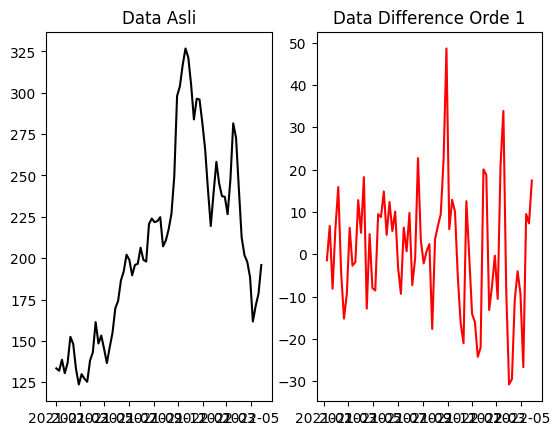

In [49]:
differencing(train['NVDA'])

Dengan demikian, kita peroleh orde D sebesar 1. Selanjutnya, kita bentuk sebuah fungsi yang dapat mencari nilai AR dan MA terbaik secara otomatis berdasarkan RMSE data test.

In [50]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

def autoarima(train, D, test):
    orde_arima = []
    orde_seasonal = []
    rmse_train = []
    rmse_test = []

    order_grid = list(product(range(3), repeat = 3))
    s_order_grid = list(product(range(3), repeat = 4))

    for order in order_grid:
        for s_order in s_order_grid:
            if order[1] == D:
                try:
                    model = ARIMA(endog = train, order = order, seasonal_order = s_order).fit()
                    eval_train = np.sqrt(mean_squared_error(train, model.fittedvalues))
                    eval_test = np.sqrt(mean_squared_error(test, model.forecast(len(test))))
                    
                    orde_arima.append(order)
                    orde_seasonal.append(s_order)
                    rmse_train.append(eval_train)
                    rmse_test.append(eval_test)
                except:
                    pass

    return(pd.DataFrame({'Orde ARIMA' : orde_arima,
                        'Orde Seasonal' : orde_seasonal,
                        'RMSE Train' : rmse_train,
                        'RMSE Test' : rmse_test}))                

In [51]:
hasil_arima = autoarima(train['NVDA'], 1, test['NVDA'])

Tampilkan hasil model terbaik dan terburuk ARIMA

In [52]:
best_arima = hasil_arima[hasil_arima['RMSE Test'] == np.min(hasil_arima['RMSE Test'])]
worst_arima = hasil_arima[hasil_arima['RMSE Test'] == np.max(hasil_arima['RMSE Test'])]
print("Best Arima\n", best_arima)
print("Worst Arima\n", worst_arima)

Best Arima
    Orde ARIMA Orde Seasonal  RMSE Train  RMSE Test
64  (0, 1, 2)  (2, 1, 0, 2)   22.491307  25.200704
Worst Arima
   Orde ARIMA Orde Seasonal  RMSE Train    RMSE Test
7  (0, 1, 0)  (0, 2, 0, 2)    41.12293  2847.718872


Terlihat bahwa kombinasi parameter orde ARIMA adalah (0,1,2) dan parameter seasonal nya adalah (2,1,0,2). Seperti sebelumnya, kita bandingkan keduanya dalam plot.

In [53]:
# Lakukan fitting dan forecast
best_arima = ARIMA(train['NVDA'], order = (0, 1, 2), seasonal_order=(2,1,0,2)).fit()
best_arima_fitted = best_arima.fittedvalues
best_arima_forecast = best_arima.forecast(len(test))

worst_arima = ARIMA(train['NVDA'], order = (0,1,0), seasonal_order=(0,2,0,2)).fit()
worst_arima_fitted = worst_arima.fittedvalues
worst_arima_forecast = worst_arima.forecast(len(test))

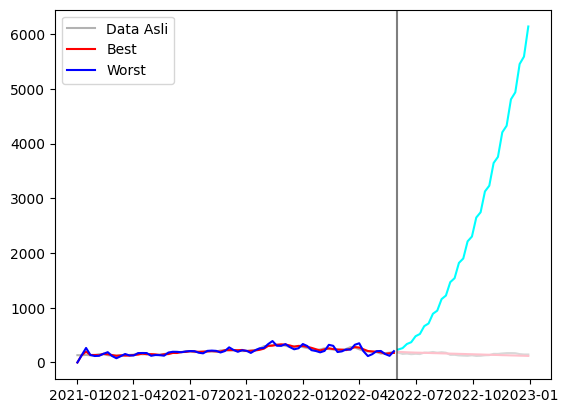

In [54]:
# Data Asli
(line1,) = plt.plot(train['NVDA'], color = 'black', alpha = 0.3)
plt.plot(test['NVDA'], color = 'gray', alpha = 0.3)

# Ramalan Terbaik
(line2,) = plt.plot(best_arima_fitted, color = 'red')
plt.plot(best_arima_forecast, color = 'pink')

# Ramalan Terburuk
(line3,) = plt.plot(worst_arima_fitted, color = 'blue')
plt.plot(worst_arima_forecast, color = 'cyan')

plt.axvline(cutoff_date, alpha = 0.5, color = 'black')

plt.legend([line1, line2, line3], ['Data Asli', 'Best', 'Worst'])